In [58]:
from datetime import datetime, timezone
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from models.time_series_composer import TimeSeriesComposer
from models.time_series_generator import TimeSeriesGenerator

In [59]:
from_utc = datetime(2025, 4, 1, tzinfo=timezone.utc)
to_utc = datetime(2025, 4, 16, tzinfo=timezone.utc)
generator = TimeSeriesGenerator(from_utc, to_utc, '1h')

b = 0.01
w = 0.25
df = generator.generate(lambda x : x * w + b + np.random.randn(), col_name="price")
df = TimeSeriesComposer.shift_column(df, col_name="price")
df.dropna(inplace = True) 

#df.head()

In [60]:
X = np.array(df['price_T-1']).reshape(-1, 1)
y = np.array(df['price']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [61]:
regression = LinearRegression() 
regression.fit(X_train, y_train) 
y_pred = regression.predict(X_test) 


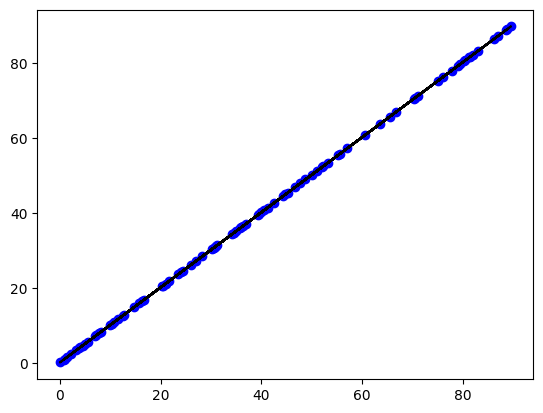

In [62]:
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 


In [63]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)  
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 3.947459643111668e-17
MSE: 1.4024193870595766e-31
RMSE: 3.744889033148481e-16


In [64]:
print("Intercept (b) = ", regression.intercept_)
print("Coefficients (w) = ", regression.coef_)

Intercept (b) =  [0.25]
Coefficients (w) =  [[1.]]
